In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_samples,silhouette_score

In [14]:
df=pd.read_csv("Mall_Customers.csv")

In [15]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
x=df.iloc[:,[3,4]].values

In [17]:
import scipy.cluster.hierarchy as sch

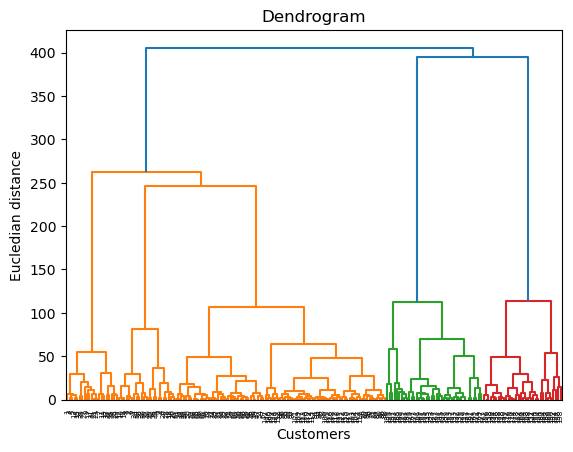

In [18]:
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucledian distance')
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering 

In [20]:
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

In [21]:
y_hc=hc.fit_predict(x)

In [22]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

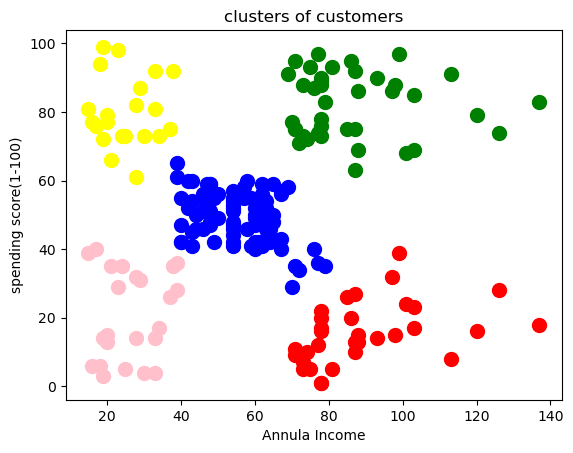

In [23]:
## visualize the clusters 
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='red',label='cluster1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='blue',label='cluster2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='green',label='cluster3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='pink',label='cluster5')
plt.title('clusters of customers')
plt.xlabel('Annula Income')
plt.ylabel('spending score(1-100)')
plt.show()

In [29]:
lst_sl_avg=[]
for i in range(2,6):
    cluster_model=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    cluster_labels=cluster_model.fit_predict(x)
    sil_avg=silhouette_score(x,cluster_labels)
    lst_sl_avg.append(sil_avg)

In [30]:
lst_sl_avg

[0.36706444723912895,
 0.4618340266628975,
 0.4916598193892782,
 0.5529945955148897]